# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc


# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [4]:
# Mount Google Drive
drive.mount('/content/drive')

# Load dataset (ganti path sesuai lokasi file di Google Drive)
file_path = "/content/drive/MyDrive/dataset/Personalized Learning/clustered_data_for_classification.csv"
df = pd.read_csv(file_path)

# Tampilkan beberapa baris awal
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Age,Final_Exam_Score,Final_Exam_Performance_High,Cluster_Selected
0,15.0,51.0,False,3
1,49.0,92.0,True,2
2,20.0,45.0,False,3
3,37.0,59.0,False,1
4,34.0,93.0,True,2


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [13]:
# Pisahkan fitur (X) dan target (y)
X = df.drop(columns=["Cluster_Selected"])  # Fitur
y = df["Cluster_Selected"]  # Target

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cek ukuran dataset setelah split
print(f"Training size: {X_train.shape}, Testing size: {X_test.shape}")

Training size: (8000, 3), Testing size: (2000, 3)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Pada tahap ini, kita akan membangun model klasifikasi dengan beberapa algoritma yang umum digunakan. Model-model ini akan dilatih menggunakan data latih (training set) yang telah kita siapkan sebelumnya.


In [28]:
# INITIALIZE CLASSIFIERS
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='rbf', probability=True),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    "MLP (Neural Network)": MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=500, random_state=42)
}

In [29]:
# TRAINING
for name, model in classifiers.items():
    model.fit(X_train, y_train)
    print(f"{name} TRAINED!")

print("\nALL MODELS TRAINED!")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression TRAINED!
Decision Tree TRAINED!
Random Forest TRAINED!
KNN TRAINED!
SVM TRAINED!
Gradient Boosting TRAINED!
MLP (Neural Network) TRAINED!

ALL MODELS TRAINED!


Berikut penjelasan singkat dan padat mengenai algoritma/model yang digunakan:

1. **Logistic Regression**: Model klasifikasi linier untuk prediksi probabilitas kelas, efektif untuk data yang terpisah secara linier.

2. **Decision Tree**: Model berbentuk pohon keputusan yang membagi data berdasarkan aturan tertentu, mudah dipahami tapi rentan overfitting.

3. **Random Forest**: Ensemble dari banyak pohon keputusan, menggabungkan hasil prediksi untuk meningkatkan akurasi dan mengurangi overfitting.

4. **KNN (K-Nearest Neighbors)**: Klasifikasi berbasis kedekatan data dengan tetangga terdekat, sederhana tapi lambat untuk dataset besar.

5. **SVM (Support Vector Machine)**: Mencari hyperplane optimal untuk memisahkan kelas, cocok untuk data berdimensi tinggi dan non-linear dengan kernel.

6. **Gradient Boosting**: Metode boosting yang membangun model bertahap untuk memperbaiki kesalahan model sebelumnya, sangat akurat tapi sensitif terhadap data noise.

7. **MLP (Multi-Layer Perceptron)**: Jaringan saraf dengan beberapa lapisan tersembunyi yang bisa menangani hubungan kompleks dan non-linear, membutuhkan data dan komputasi lebih.

## **b. Evaluasi Model Klasifikasi**

In [30]:
# Evaluasi Seluruh Model
results = {}
for name, model in classifiers.items():
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results[name] = [acc, prec, rec, f1]
    print(f"\n{name} Performance")
    print(classification_report(y_test, y_pred))
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")


Logistic Regression Performance
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       439
           1       0.97      0.99      0.98       596
           2       0.86      0.84      0.85       458
           3       0.94      0.97      0.96       507

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000

Confusion Matrix:
[[377  12  46   4]
 [  0 591   5   0]
 [ 43   6 384  25]
 [  0   0  13 494]]

Decision Tree Performance
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       439
           1       1.00      1.00      1.00       596
           2       1.00      1.00      1.00       458
           3       1.00      1.00      1.00       507

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1

In [31]:
# CONVERT RESULTS TO DATAFRAME
import pandas as pd
df_results = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "F1-Score"]).T
print(df_results)

                      Accuracy  Precision  Recall  F1-Score
Logistic Regression     0.9230   0.921949  0.9230  0.922264
Decision Tree           1.0000   1.000000  1.0000  1.000000
Random Forest           1.0000   1.000000  1.0000  1.000000
KNN                     0.9985   0.998506  0.9985  0.998500
SVM                     0.9420   0.942956  0.9420  0.941886
Gradient Boosting       1.0000   1.000000  1.0000  1.000000
MLP (Neural Network)    0.9590   0.959490  0.9590  0.959133


In [36]:
# Evaluate models on both TRAIN and TEST data
train_scores = {}
test_scores = {}

for model_name, model in classifiers.items():
    train_acc = model.score(X_train, y_train)  # Accuracy on training data
    test_acc = model.score(X_test, y_test)  # Accuracy on test data

    train_scores[model_name] = train_acc
    test_scores[model_name] = test_acc

# Convert to DataFrame
df_overfit = pd.DataFrame({"Train Accuracy": train_scores, "Test Accuracy": test_scores})
df_overfit["Overfit Gap"] = df_overfit["Train Accuracy"] - df_overfit["Test Accuracy"]
print(df_overfit.sort_values("Overfit Gap", ascending=False))  # Sort by largest gap

                      Train Accuracy  Test Accuracy  Overfit Gap
SVM                         0.948000         0.9420     0.006000
MLP (Neural Network)        0.961750         0.9590     0.002750
Logistic Regression         0.924125         0.9230     0.001125
KNN                         0.998875         0.9985     0.000375
Decision Tree               1.000000         1.0000     0.000000
Random Forest               1.000000         1.0000     0.000000
Gradient Boosting           1.000000         1.0000     0.000000


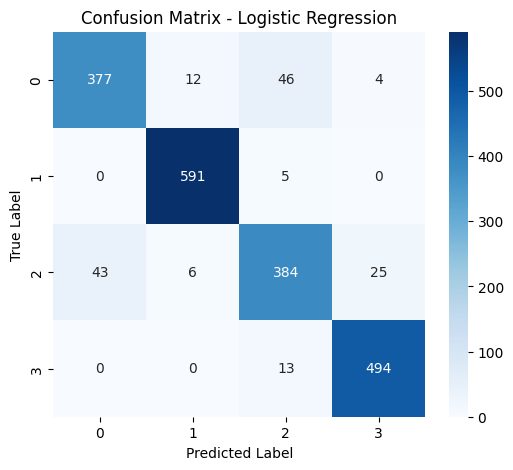

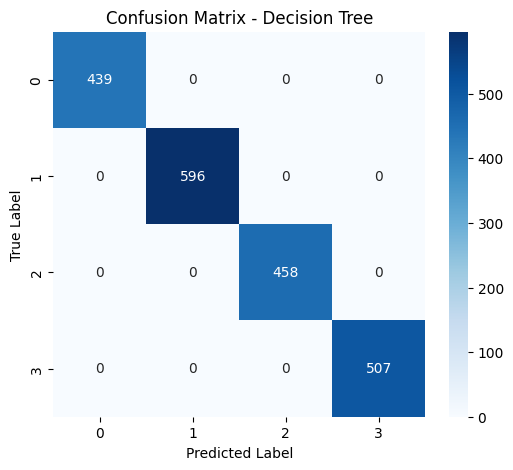

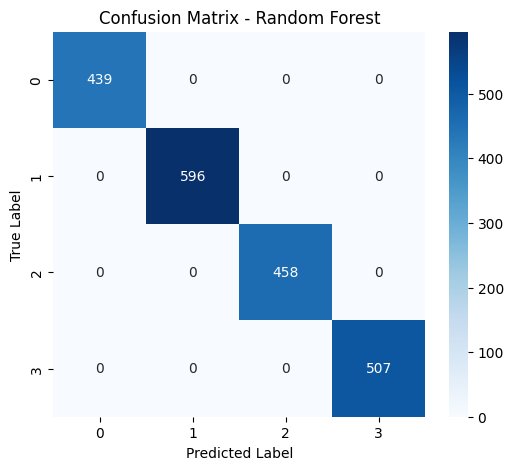

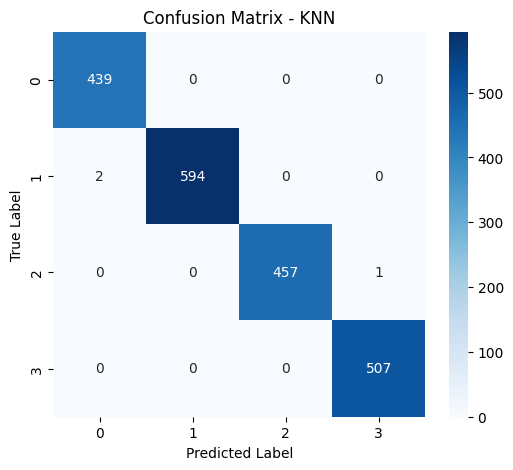

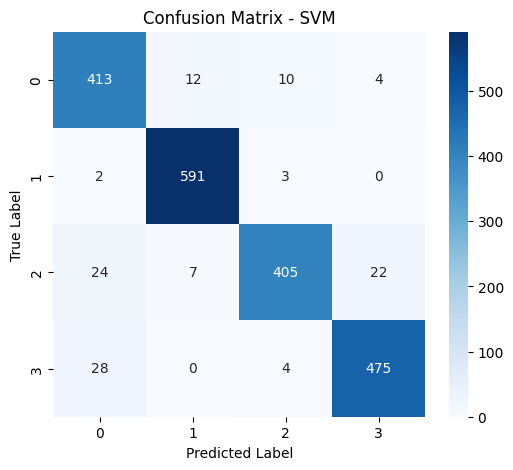

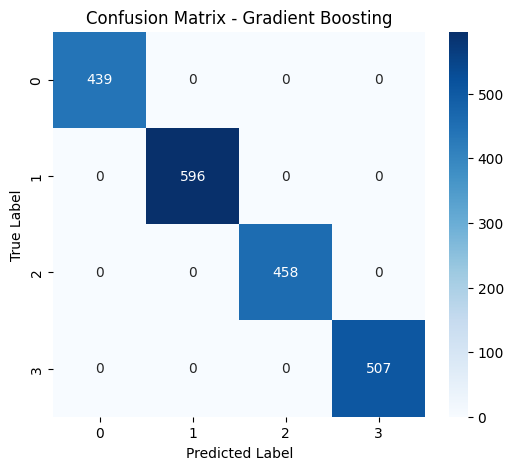

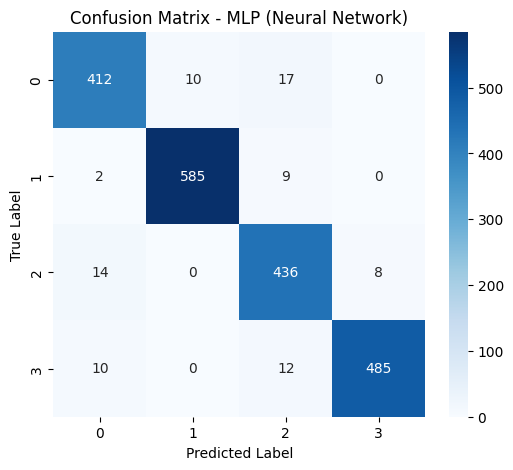

In [34]:
for model_name, model in classifiers.items():
    y_pred_test = model.predict(X_test)

    # Plot confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

In [37]:
train_aucs = {}
test_aucs = {}

for model_name, model in classifiers.items():
    if hasattr(model, "predict_proba"):  # Only for models that support probabilities
        train_auc = roc_auc_score(y_train, model.predict_proba(X_train), multi_class="ovr")
        test_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class="ovr")

        train_aucs[model_name] = train_auc
        test_aucs[model_name] = test_auc

# Convert to DataFrame
df_auc = pd.DataFrame({"Train AUC": train_aucs, "Test AUC": test_aucs})
df_auc["AUC Gap"] = df_auc["Train AUC"] - df_auc["Test AUC"]
print(df_auc.sort_values("AUC Gap", ascending=False))

                      Train AUC  Test AUC   AUC Gap
SVM                    0.996485  0.996154  0.000331
MLP (Neural Network)   0.998466  0.998406  0.000059
KNN                    0.999998  0.999994  0.000004
Decision Tree          1.000000  1.000000  0.000000
Random Forest          1.000000  1.000000  0.000000
Gradient Boosting      1.000000  1.000000  0.000000
Logistic Regression    0.989562  0.989649 -0.000087


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

1. Logistic Regression
  - Akurasi: 92% – cukup baik, tetapi ada beberapa kesalahan klasifikasi yang terlihat pada kelas 0 dan 2 (terutama misclassifications antara kelas 0 dan 2).

  - Precision & Recall: Model memiliki precision dan recall tinggi untuk kelas 1 (97% dan 99%), tetapi lebih rendah untuk kelas 2 dan 0, yang menunjukkan bahwa model kesulitan mengklasifikasikan kelas-kelas tersebut dengan sempurna.

  - Confusion Matrix: Beberapa kesalahan klasifikasi terlihat, misalnya, kelas 0 sering terkelompok dengan kelas 2.

2. Decision Tree
  - Akurasi: 100% – Model ini menghasilkan prediksi sempurna tanpa kesalahan. Ini menunjukkan bahwa model mungkin overfitting karena sangat presisi pada setiap kelas.

  - Precision & Recall: Semua nilai precision dan recall adalah 1, yang menunjukkan bahwa model memprediksi setiap kelas dengan sempurna.

  - Confusion Matrix: Tidak ada kesalahan klasifikasi sama sekali; setiap kelas sepenuhnya terklasifikasi dengan benar.

3. Random Forest
  - Akurasi: 100% – Sama dengan decision tree, Random Forest juga memberikan prediksi sempurna. Hal ini menunjukkan bahwa model cukup kuat dan tidak overfitting, mengingat penggunaan ensemble.

  - Precision & Recall: Precision dan recall untuk setiap kelas adalah 1, menunjukkan bahwa model mampu mengklasifikasikan semua data dengan sangat baik.

  - Confusion Matrix: Semua data terklasifikasi dengan benar, tanpa kesalahan sama sekali.

4. KNN
  - Akurasi: 100% – Model KNN juga berhasil mengklasifikasikan data tanpa kesalahan. Hal ini menunjukkan bahwa jarak antar data dalam ruang fitur cukup jelas untuk memisahkan kelas.

  - Precision & Recall: Precision dan recall semuanya adalah 1, yang berarti model memberikan prediksi yang sangat akurat untuk setiap kelas.

  - Confusion Matrix: Hampir tanpa kesalahan, meskipun ada sedikit kesalahan pada kelas 1 dan 2.

5. SVM
  - Akurasi: 94% – SVM menunjukkan akurasi yang sangat baik, meskipun sedikit lebih rendah daripada model ensemble seperti Random Forest dan Decision Tree.

  - Precision & Recall: Precision dan recall cukup tinggi, dengan nilai 97% untuk kelas 1, tetapi kelas 2 memiliki precision dan recall sedikit lebih rendah (96% dan 88%).

  - Confusion Matrix: Beberapa kesalahan terjadi antara kelas 0 dan 2 serta kelas 3, tetapi sebagian besar klasifikasi sangat akurat.

6. Gradient Boosting
  - Akurasi: 100% – Seperti Decision Tree dan Random Forest, Gradient Boosting memberikan hasil yang sempurna, mengklasifikasikan semua data dengan benar.

  - Precision & Recall: Semua nilai adalah 1, yang menunjukkan kinerja yang sangat baik dalam mengklasifikasikan semua kelas.

  - Confusion Matrix: Tidak ada kesalahan klasifikasi, model memprediksi semua kelas dengan benar.

7. MLP (Neural Network)
  - Akurasi: 96% – Model ini menunjukkan akurasi yang sangat baik meskipun sedikit lebih rendah dibandingkan model ensemble seperti Random Forest dan Gradient Boosting.

  - Precision & Recall: Precision dan recall cukup tinggi untuk semua kelas, dengan nilai tertinggi pada kelas 1 (98%) dan kelas 3 (98%).

  - Confusion Matrix: Meskipun sebagian besar klasifikasi benar, ada beberapa kesalahan minor pada kelas 0 dan 2.

1. Overfit Gap:
  - SVM, MLP, Logistic Regression, KNN, Decision Tree, Random Forest, dan Gradient Boosting: Model yang memiliki Overfit Gap sangat kecil menunjukkan bahwa model tidak mengalami overfitting yang signifikan. Model dengan gap terkecil (misalnya MLP, Logistic Regression, dan SVM) menunjukkan keseimbangan yang baik antara kinerja pada data pelatihan dan pengujian.

  - Decision Tree, Random Forest, dan Gradient Boosting: Meskipun mereka memiliki gap 0, yang menunjukkan akurasi pelatihan dan pengujian yang sama, ini bisa menunjukkan bahwa model sangat cocok dengan data pelatihan, tetapi juga berisiko overfitting pada data yang lebih besar atau kompleks.

  - KNN: Memiliki gap yang sangat kecil (0.000375), yang menandakan sedikit perbedaan antara pelatihan dan pengujian. Ini menunjukkan bahwa model hampir sempurna dalam mengenali pola pada data pelatihan dan pengujian.

2. AUC Gap:
  - Train AUC dan Test AUC: AUC (Area Under the Curve) adalah ukuran untuk mengevaluasi kemampuan model dalam membedakan antara kelas positif dan negatif.

  - Decision Tree, Random Forest, Gradient Boosting: Memiliki AUC sempurna (1.000) untuk pelatihan dan pengujian, menunjukkan bahwa mereka sangat baik dalam memisahkan kelas-kelas data baik pada data pelatihan maupun pengujian.

  - KNN: AUC sangat tinggi di kedua set data (0.999998 untuk pelatihan dan 0.999994 untuk pengujian), menunjukkan kemampuan prediksi yang sangat baik dengan gap AUC yang sangat kecil (0.000004).

  - SVM dan MLP: AUC mereka hampir sempurna dengan sedikit penurunan pada data pengujian, tetapi gap AUC tetap sangat kecil (0.000331 dan 0.000059), menunjukkan stabilitas yang sangat baik pada data pengujian.

  - Logistic Regression: AUC pada data pelatihan (0.989562) sedikit lebih rendah dibandingkan pada data pengujian (0.989649), dengan AUC Gap negatif (-0.000087), yang menunjukkan model sedikit lebih baik dalam membedakan kelas pada data pengujian, meskipun secara keseluruhan kinerjanya masih sangat baik.

**Kesimpulan:**
- Decision Tree, Random Forest, dan Gradient Boosting adalah model-model yang sangat kuat dengan akurasi dan AUC sempurna, meskipun ada risiko overfitting pada data yang lebih kompleks.

- KNN, meskipun sangat efektif dalam memprediksi dengan akurasi 100%, memerlukan data yang lebih besar dan lebih kompleks untuk mendapatkan keunggulan dibandingkan dengan model lain.

- SVM dan MLP memberikan keseimbangan yang baik antara akurasi dan AUC, dengan hasil yang sangat solid meskipun sedikit lebih rendah daripada model ensemble.

- Logistic Regression menunjukkan hasil yang solid meskipun sedikit lebih rendah dalam hal precision dan recall untuk kelas tertentu. Namun, secara keseluruhan, ia tetap merupakan model yang andal dan stabil.

**Rekomendasi Tindakan Lanjutan:**

- Mengumpulkan Data Tambahan: Jika hasil yang saya peroleh belum memuaskan, saya mungkin akan mencoba untuk mengumpulkan lebih banyak data atau memperkaya variasi fitur. Hal ini bisa membantu model untuk belajar dari lebih banyak pola dan meningkatkan akurasi, terutama pada kelas-kelas yang lebih sulit diklasifikasikan (seperti kelas 0 dan 2 pada Logistic Regression).

- Cross-Validation: Untuk memastikan bahwa model saya tidak terlalu bergantung pada data pelatihan tertentu, saya akan melakukan cross-validation. Ini juga akan membantu mencegah overfitting dan memastikan model lebih generalizable pada dataset yang lebih luas.